In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#pip install pmdarima

In [9]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\DailyTemps.csv",index_col='DATE', parse_dates=['DATE'])
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [10]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


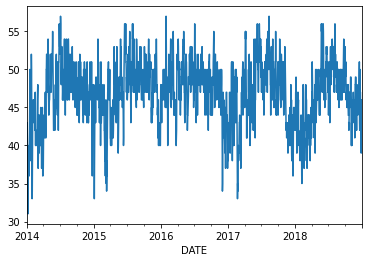

In [11]:
df["AvgTemp"].plot()

In [12]:
df.isna().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.AvgTemp)
pval=res[1]
if pval>0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


In [15]:
from pmdarima import auto_arima

In [16]:
auto_model=auto_arima(df["AvgTemp"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8345.516, Time=4.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.910, Time=1.52 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8346.843, Time=4.95 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.075, Time=4.95 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.191, Time=5.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.398, Time=6.17 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.447, Time=6.85 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8318.601, Time=8.24 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8307.508, Time=6.71 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [17]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.346
Date:                Sat, 01 May 2021   AIC                           8294.691
Time:                        17:58:04   BIC                           8338.748
Sample:                             0   HQIC                          8310.945
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2047      0.364      3.313      0.001       0.492       1.917
ar.L1          0.9741      0.008    124.283      0.000       0.959       0.989
ma.L1         -0.1281      0.024     -5.381      0.000      -0.175      -0.081
ma.L2         -0.2190      0.024     -9.031      0.000      -0.267      -0.171
ma.L3         -0.2046      0.024     -8.516      0.000      -0.252      -0.158
ma.L4         -0.1356      0.023     -5.916      0.000      -0.181      -0.091
ma.L5         -0.0512      0.025     -2.089      0.037      -0.099      -0.003
sigma2         5.5312      0.174     31.762      0.000       5.190       5.872
===================================================================================
Ljung-Box (Q):                       34.82   Jarque-Bera (JB):                20.27
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
X=df["AvgTemp"]

In [19]:
len(X)

1821

In [20]:
train_len=int(0.8*len(X))

In [21]:
train=X[:train_len]
len(train)

1456

In [22]:
#train.head()

In [23]:
test=X[train_len:]
len(test)

365

In [24]:
1456+365

1821

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1456
Model:                     ARMA(1, 5)   Log Likelihood               -3334.671
Method:                       css-mle   S.D. of innovations              2.389
Date:                Sat, 01 May 2021   AIC                           6685.343
Time:                        17:58:17   BIC                           6727.610
Sample:                             0   HQIC                          6701.113
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.860     54.101      0.000      44.844      48.215
ar.L1.AvgTemp     0.9844      0.009    112.835      0.000       0.967       1.002
ma.L1.AvgTemp    -0.1312      0.028     -4.704      0.000      -0.186      -0.077
ma.L2.AvgTemp    -0.2444      0.028     -8.852      0.000      -0.299      -0.190
ma.L3.AvgTemp    -0.2051      0.029     -7.029      0.000      -0.262      -0.148
ma.L4.AvgTemp    -0.1476      0.027     -5.486      0.000      -0.200      -0.095
ma.L5.AvgTemp    -0.0584      0.028     -2.082      0.037      -0.113      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0158           +0.0000j            1.0158            0.0000
MA.1            1.0910           -0.0000j            1.0910           -0.0000
MA.2            0.0718           -1.8558j            1.8572           -0.2438
MA.3            0.0718           +1.8558j            1.8572            0.2438
MA.4           -1.8803           -1.0060j            2.1325           -0.4218
MA.5           -1.8803           +1.0060j            2.1325            0.4218
-----------------------------------------------------------------------------
"""

In [28]:
#ARIMA(p,q) #d=0
#ARIMA(p,d,q)

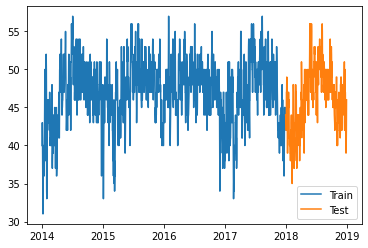

In [29]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [30]:
ypred_train=model_fit.predict()

In [31]:
ypred_train

DATE
2014-01-01    46.529300
2014-01-02    41.196913
2014-01-03    43.977315
2014-01-04    41.710017
2014-01-05    38.275591
                ...    
2017-12-25    44.577264
2017-12-26    41.599459
2017-12-27    43.747998
2017-12-28    44.505476
2017-12-29    42.748241
Length: 1456, dtype: float64

In [32]:
#Predictions on Test dataset

In [33]:
#start->len(train) 

In [34]:
#end->len(train)+len(test)-1
#end->len(X)-1

In [35]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [36]:
ypred_test,test

(1456    42.929233
 1457    42.907451
 1458    43.061214
 1459    43.165983
 1460    43.203594
           ...    
 1816    46.516778
 1817    46.516972
 1818    46.517164
 1819    46.517353
 1820    46.517539
 Length: 365, dtype: float64,
 DATE
 2017-12-30    44.0
 2017-12-31    44.0
 2018-01-01    44.0
 2018-01-02    44.0
 2018-01-03    42.0
               ... 
 2018-12-26    40.0
 2018-12-27    39.0
 2018-12-28    40.0
 2018-12-29    42.0
 2018-12-30    46.0
 Name: AvgTemp, Length: 365, dtype: float64)

In [37]:
date_test=pd.date_range(start='2017-12-30',end="2018-12-29")
date_test

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=365, freq='D')

In [38]:
ypred_test.index=date_test

In [39]:
ypred_test

2017-12-30    42.929233
2017-12-31    42.907451
2018-01-01    43.061214
2018-01-02    43.165983
2018-01-03    43.203594
                ...    
2018-12-25    46.516778
2018-12-26    46.516972
2018-12-27    46.517164
2018-12-28    46.517353
2018-12-29    46.517539
Freq: D, Length: 365, dtype: float64

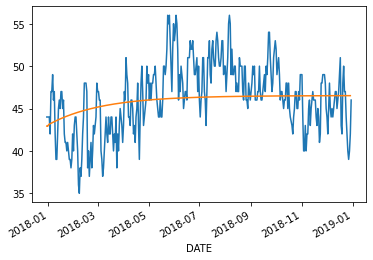

In [40]:
test.plot()
ypred_test.plot()

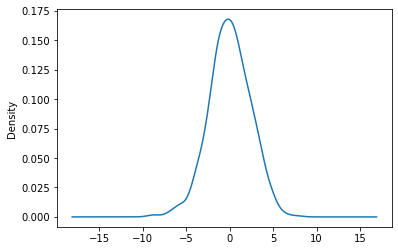

In [41]:
residuals=model_fit.resid
residuals.plot(kind="kde")

In [42]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 14.341767517370197
RMSE is : 3.787052616134373


In [43]:
#predict 30 future values

In [44]:
model=ARIMA(X,order=(1,0,5))
model_fit=model.fit()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [45]:
X

DATE
2014-01-01    40.0
2014-01-02    43.0
2014-01-03    41.0
2014-01-04    37.0
2014-01-05    31.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 1821, dtype: float64

In [46]:
forecast=model_fit.predict(start=len(X),end=len(X)+29)

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [47]:
forecast

1821    46.418065
1822    46.113784
1823    45.617773
1824    45.249558
1825    45.116987
1826    45.136774
1827    45.156283
1828    45.175520
1829    45.194486
1830    45.213187
1831    45.231626
1832    45.249807
1833    45.267733
1834    45.285408
1835    45.302835
1836    45.320018
1837    45.336961
1838    45.353666
1839    45.370137
1840    45.386377
1841    45.402390
1842    45.418178
1843    45.433745
1844    45.449095
1845    45.464229
1846    45.479151
1847    45.493864
1848    45.508371
1849    45.522674
1850    45.536778
dtype: float64

In [48]:
forecast_date=pd.date_range(start="2019-01-01",end="2019-01-30")
len(forecast_date),len(forecast)

(30, 30)

In [49]:
forecast.index=forecast_date

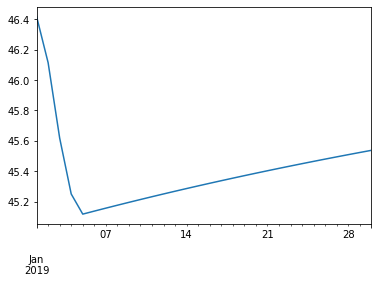

In [50]:
forecast.plot()